# About Company
# Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem
# Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.



In [1]:
from pyforest import * 

In [2]:
train=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/supervised classificaton/day4/train.csv")

In [3]:
test=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/supervised classificaton/day4/test.csv")

In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
pd.DataFrame(train.groupby("Married")['Loan_Status'].value_counts())

Loan_Status
Married Loan_Status             
No      Y                    134
        N                     79
Yes     Y                    285
        N                    113

In [9]:
pd.DataFrame(train.groupby("Self_Employed")['Loan_Status'].value_counts())

Loan_Status
Self_Employed Loan_Status             
No            Y                    343
              N                    157
Yes           Y                     56
              N                     26

In [10]:
train.Gender.value_counts().plot(kind='bar')

In [11]:
import seaborn as sns 

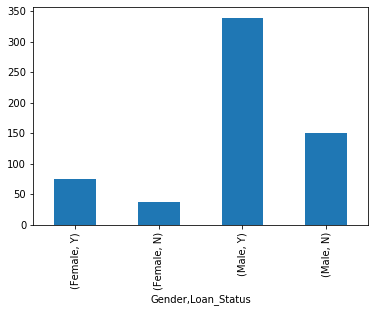

In [12]:
train.groupby("Gender")['Loan_Status'].value_counts().plot(kind='bar')

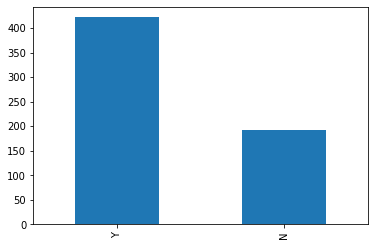

In [13]:
train.Loan_Status.value_counts().plot(kind='bar')

In [14]:
#the loan approval ratio is  
train.Loan_Status.value_counts()[0]/train.Loan_Status.shape

array([0.68729642])

# balancing it 

In [15]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
#3+ replace
train.Dependents.replace(to_replace="3+",value=3,inplace=True)

In [17]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

# more salary people in loan process rather then self employed

In [19]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

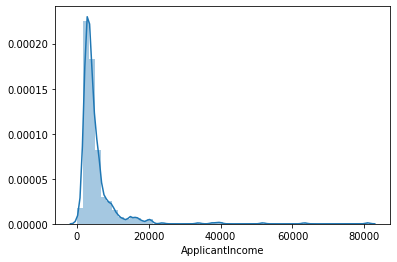

In [20]:
sns.distplot(train.ApplicantIncome)
#income is skewed in naturre

# hypothesis check 
# if the data is not skewed the parametric test we perform is t test which is on the mean
 # if the data is skewed the parametric test is performed on the median 
# if the data is normal in nature then the parametric test is done on the mean
# if the data is skewed the parametric test is done on the median 


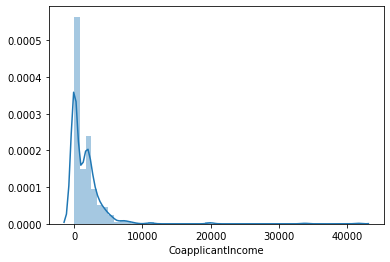

In [21]:
sns.distplot(train.CoapplicantIncome)

# skewed in nature

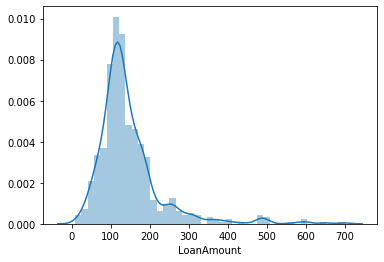

In [22]:
sns.distplot(train.LoanAmount.dropna())

# just dropped na here just to see the outcome the real data has not been changed


In [23]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
#repayment is mostly of 360 months

In [26]:
train.isnull().sum()[train.isnull().sum()!=0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

# missing value 

# have to work on test data set as well 

In [27]:
combined = pd.concat([train, test], ignore_index = True, 
                     sort = False)

In [28]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
combined.shape

(981, 13)

# to do  
treat null  values '


In [30]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender               24
Married               3
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [31]:
combined[pd.isnull(combined.Married)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [32]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')]['Married'].value_counts()

Yes    348
No     138
Name: Married, dtype: int64

In [33]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')]['Married'].value_counts()

No     82
Yes    41
Name: Married, dtype: int64

In [34]:
combined.loc[(combined.Gender=="Male") & (combined.Married.isnull()), "Married"]='Yes'

In [35]:
combined.loc[(combined.Gender=="Female") & (combined.Married.isnull()), "Married"]='No'

In [36]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender               24
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [37]:
combined[pd.isnull(combined.Gender)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [38]:
combined[(combined.Education=='Graduate')&(combined.Married=='Yes')&(combined.Self_Employed=='No')]['Gender'].value_counts()

Male      350
Female     41
Name: Gender, dtype: int64

In [39]:
combined[(combined.Education=='Graduate')&(combined.Married=='No')&(combined.Self_Employed=='No')]['Gender'].value_counts()

Male      138
Female     83
Name: Gender, dtype: int64

In [40]:
combined[(combined.Education=='Graduate')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')]['Gender'].value_counts()

Male      57
Female     3
Name: Gender, dtype: int64

In [41]:
combined[(combined.Education=='Graduate')&(combined.Married=='No')&(combined.Self_Employed=='Yes')]['Gender'].value_counts()

Male      17
Female    12
Name: Gender, dtype: int64

In [42]:
combined.loc[(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.Gender.isnull()), "Gender"]='Male'

In [43]:
combined.Gender.isnull().sum()

20

In [44]:
combined.loc[(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.Gender.isnull()), "Gender"]='Male'

In [45]:
combined.Gender.isnull().sum()

11

In [46]:
combined.loc[(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.Gender.isnull()), "Gender"]='Male'

In [47]:
combined.Gender.isnull().sum()

2

In [48]:
combined.loc[(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.Gender.isnull()), "Gender"]='Male'

In [49]:
combined.Gender.isnull().sum()

0

In [50]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [51]:
combined.drop(['Loan_ID'],inplace=True,axis=1)

In [52]:
combined.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
combined.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [54]:
combined.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
combined[pd.isnull(combined.Dependents)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [56]:
combined.Dependents.value_counts()

0     545
2     160
1     160
3      51
3+     40
Name: Dependents, dtype: int64

In [57]:
combined.Dependents.replace(to_replace="3+",value=3,inplace=True)

In [58]:
combined.Dependents.value_counts()

0    545
2    160
1    160
3     91
Name: Dependents, dtype: int64

# yes yes 
no yes 
yes no 
no no 


In [59]:
#married no self employed no
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Dependents'].value_counts()

0    63
1    11
3     3
2     2
Name: Dependents, dtype: int64

In [60]:
#married no self employed yes
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Dependents'].value_counts()

0    8
1    2
2    1
Name: Dependents, dtype: int64

In [61]:
#married yes self employed yes
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Dependents'].value_counts()

1    2
0    1
Name: Dependents, dtype: int64

In [62]:
#married yes 
#self employed no
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Dependents'].value_counts()

0    25
1     8
2     7
3     1
Name: Dependents, dtype: int64

In [63]:
#married no self emp no 
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Dependents'].value_counts()

0    17
1     1
3     1
Name: Dependents, dtype: int64

In [64]:
#married yes self emp no
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Dependents'].value_counts()

0    159
2     75
1     69
3     45
Name: Dependents, dtype: int64

In [65]:
#married yes self employment yes
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Dependents'].value_counts()

0    20
2    18
1    16
3     5
Name: Dependents, dtype: int64

In [66]:
#married no self employed yes
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Dependents'].value_counts()

0    17
1     1
3     1
Name: Dependents, dtype: int64

In [67]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.Dependents.isnull()), "Dependents"]='0'

In [68]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.Dependents.isnull()), "Dependents"]='0'

In [69]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.Dependents.isnull()), "Dependents"]='0'

In [70]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.Dependents.isnull()), "Dependents"]='0'

# female

In [71]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.Dependents.isnull()), "Dependents"]='1'

In [72]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.Dependents.isnull()), "Dependents"]='0'

In [73]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.Dependents.isnull()), "Dependents"]='0'

In [74]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.Dependents.isnull()), "Dependents"]='0'

In [75]:
combined[pd.isnull(combined.Dependents)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [76]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [77]:
combined.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
combined[pd.isnull(combined.Credit_History)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [79]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    59
0.0    17
Name: Credit_History, dtype: int64

In [80]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Credit_History'].value_counts()

1.0    34
0.0     4
Name: Credit_History, dtype: int64

In [81]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    8
0.0    2
Name: Credit_History, dtype: int64

In [82]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Credit_History'].value_counts()

0.0    2
1.0    1
Name: Credit_History, dtype: int64

# male

In [83]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Credit_History'].value_counts()

1.0    51
0.0     5
Name: Credit_History, dtype: int64

In [84]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    16
0.0     2
Name: Credit_History, dtype: int64

In [85]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Credit_History'].value_counts()

1.0    287
0.0     43
Name: Credit_History, dtype: int64

In [86]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    111
0.0     24
Name: Credit_History, dtype: int64

In [87]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.Credit_History.isnull()), "Credit_History"]='0.0'

In [88]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [89]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [90]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

# male

In [91]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [92]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [93]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [94]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [95]:
combined[pd.isnull(combined.Credit_History)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
236,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
411,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
600,Female,No,3,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
873,Female,No,1,Graduate,NaN,1850,4583.0,81.0,360.0,NaN,Rural,NaN


In [96]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Dependents=='1')&(combined.Married=='Yes')]['Credit_History'].value_counts()

1.0    72
0.0    13
1.0     5
Name: Credit_History, dtype: int64

In [97]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Dependents=='0')&(combined.Married=='Yes')]['Credit_History'].value_counts()

1.0    160
1.0     20
0.0     16
Name: Credit_History, dtype: int64

In [98]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Dependents=='0')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    119
0.0     24
1.0      7
Name: Credit_History, dtype: int64

In [99]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Dependents=='1')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    13
1.0     1
Name: Credit_History, dtype: int64

In [100]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Dependents=='1')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [101]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Dependents=='0')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [102]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Dependents=='0')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [103]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Dependents=='1')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [104]:
combined[pd.isnull(combined.Credit_History)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,Female,No,3,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [105]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Married=='No')]['Credit_History'].value_counts()

1.0    72
0.0    19
1.0    10
Name: Credit_History, dtype: int64

In [106]:
combined.loc[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Married=='No')&(combined.Dependents=='3')&(combined.Credit_History.isnull()), "Credit_History"]='1.0'

In [107]:
combined[pd.isnull(combined.Credit_History)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,Female,No,3,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [108]:
combined.Credit_History.fillna(1,inplace=True)

In [109]:
combined.Credit_History.replace(to_replace=['1.0'],value=[1.0],inplace=True)

In [110]:
combined[pd.isnull(combined.Credit_History)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [111]:
combined.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [112]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Loan_Status         367
dtype: int64

In [113]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [114]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# self employed 

In [115]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Married=='Yes')]['Self_Employed'].value_counts()

No     357
Yes     60
Name: Self_Employed, dtype: int64

In [116]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Married=='No')]['Self_Employed'].value_counts()

No     145
Yes     19
Name: Self_Employed, dtype: int64

In [117]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Married=='Yes')]['Self_Employed'].value_counts()

No     41
Yes     3
Name: Self_Employed, dtype: int64

In [118]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Married=='No')]['Self_Employed'].value_counts()

No     83
Yes    12
Name: Self_Employed, dtype: int64

In [119]:
combined[(combined.Education=='NotGraduate')&(combined.Gender=='Male')&(combined.Married=='Yes')]['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

In [120]:
combined[(combined.Education=='NotGraduate')&(combined.Gender=='Male')&(combined.Married=='No')]['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

In [121]:
combined[(combined.Education=='NoGraduate')&(combined.Gender=='Female')&(combined.Married=='Yes')]['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

In [122]:
combined[(combined.Education=='NoGraduate')&(combined.Gender=='Female')&(combined.Married=='No')]['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

# male


In [123]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Education=='Graduate')&(combined.Self_Employed.isnull()), "Self_Employed"]='No'

In [124]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Education=='Graduate')&(combined.Self_Employed.isnull()), "Self_Employed"]='No'

In [125]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Education=='Graduate')&(combined.Self_Employed.isnull()), "Self_Employed"]='No'

In [126]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Education=='Graduate')&(combined.Self_Employed.isnull()), "Self_Employed"]='No'

In [127]:
combined.Self_Employed.isnull().sum()

12

In [128]:
combined.Self_Employed.fillna('No', inplace= True)

In [129]:
combined.Self_Employed.isnull().sum()

0

In [130]:
combined.isnull().sum()[combined.isnull().sum()!=0]

LoanAmount           27
Loan_Amount_Term     20
Loan_Status         367
dtype: int64

In [131]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
combined[pd.isnull(combined.LoanAmount)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [133]:
#150
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['LoanAmount'].value_counts()

150.0    4
160.0    3
260.0    3
66.0     2
108.0    2
88.0     2
130.0    2
25.0     1
110.0    1
380.0    1
267.0    1
176.0    1
70.0     1
182.0    1
184.0    1
376.0    1
155.0    1
191.0    1
144.0    1
187.0    1
239.0    1
168.0    1
120.0    1
152.0    1
240.0    1
137.0    1
122.0    1
125.0    1
87.0     1
183.0    1
75.0     1
212.0    1
214.0    1
550.0    1
105.0    1
232.0    1
90.0     1
86.0     1
180.0    1
205.0    1
106.0    1
400.0    1
480.0    1
100.0    1
188.0    1
95.0     1
162.0    1
Name: LoanAmount, dtype: int64

In [134]:
#116
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['LoanAmount'].value_counts()

116.0    2
187.0    2
128.0    2
98.0     1
138.0    1
50.0     1
292.0    1
84.0     1
141.0    1
192.0    1
120.0    1
200.0    1
83.0     1
175.0    1
650.0    1
106.0    1
Name: LoanAmount, dtype: int64

In [135]:
#160
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['LoanAmount'].value_counts()

160.0    12
100.0    11
120.0    10
110.0     9
128.0     8
150.0     8
187.0     8
125.0     7
135.0     6
158.0     6
130.0     6
104.0     6
96.0      6
180.0     5
175.0     5
90.0      5
185.0     5
200.0     5
134.0     4
170.0     4
80.0      4
123.0     4
140.0     4
143.0     4
116.0     4
275.0     4
188.0     4
131.0     4
108.0     4
115.0     4
         ..
243.0     1
480.0     1
250.0     1
324.0     1
157.0     1
257.0     1
88.0      1
159.0     1
94.0      1
58.0      1
93.0      1
137.0     1
60.0      1
26.0      1
42.0      1
256.0     1
390.0     1
163.0     1
304.0     1
40.0      1
330.0     1
57.0      1
166.0     1
207.0     1
280.0     1
436.0     1
78.0      1
127.0     1
253.0     1
297.0     1
Name: LoanAmount, Length: 159, dtype: int64

In [136]:
#187
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='No')]['LoanAmount'].value_counts()

187.0    6
176.0    4
120.0    4
130.0    4
136.0    3
40.0     3
185.0    3
80.0     3
100.0    3
152.0    3
70.0     3
71.0     3
96.0     3
150.0    3
110.0    3
98.0     2
140.0    2
50.0     2
126.0    2
107.0    2
209.0    2
155.0    2
131.0    2
141.0    2
148.0    2
118.0    2
125.0    2
74.0     2
106.0    2
138.0    2
        ..
84.0     1
116.0    1
159.0    1
66.0     1
123.0    1
99.0     1
240.0    1
108.0    1
147.0    1
104.0    1
101.0    1
88.0     1
117.0    1
94.0     1
308.0    1
124.0    1
111.0    1
46.0     1
103.0    1
105.0    1
405.0    1
162.0    1
75.0     1
311.0    1
55.0     1
196.0    1
145.0    1
161.0    1
90.0     1
296.0    1
Name: LoanAmount, Length: 94, dtype: int64

# female

In [137]:
#177
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['LoanAmount'].value_counts()

177.0    1
212.0    1
187.0    1
108.0    1
133.0    1
93.0     1
150.0    1
194.0    1
55.0     1
99.0     1
122.0    1
Name: LoanAmount, dtype: int64

In [138]:
#113
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['LoanAmount'].value_counts()

113.0    3
120.0    2
110.0    2
84.0     2
108.0    2
96.0     1
112.0    1
130.0    1
135.0    1
127.0    1
70.0     1
165.0    1
100.0    1
154.0    1
139.0    1
137.0    1
167.0    1
105.0    1
140.0    1
182.0    1
173.0    1
88.0     1
460.0    1
92.0     1
114.0    1
104.0    1
132.0    1
79.0     1
36.0     1
94.0     1
122.0    1
200.0    1
185.0    1
176.0    1
496.0    1
144.0    1
Name: LoanAmount, dtype: int64

In [139]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')]['LoanAmount'].value_counts()

110.0    4
103.0    3
112.0    3
84.0     3
135.0    3
71.0     3
120.0    3
132.0    2
116.0    2
81.0     2
95.0     2
65.0     2
115.0    2
80.0     2
90.0     2
104.0    2
151.0    1
143.0    1
54.0     1
30.0     1
162.0    1
155.0    1
255.0    1
138.0    1
214.0    1
225.0    1
93.0     1
137.0    1
44.0     1
259.0    1
        ..
46.0     1
56.0     1
200.0    1
153.0    1
94.0     1
131.0    1
117.0    1
92.0     1
74.0     1
152.0    1
55.0     1
78.0     1
150.0    1
300.0    1
102.0    1
108.0    1
67.0     1
189.0    1
124.0    1
350.0    1
9.0      1
99.0     1
40.0     1
100.0    1
113.0    1
160.0    1
60.0     1
156.0    1
134.0    1
76.0     1
Name: LoanAmount, Length: 65, dtype: int64

In [140]:
combined.loc[(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.LoanAmount.isnull()),'LoanAmount']='150'

In [141]:
combined.LoanAmount.isnull().sum()

25

In [142]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.LoanAmount.isnull()),'LoanAmount']='116'

In [143]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.LoanAmount.isnull()),'LoanAmount']='160'

In [144]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.LoanAmount.isnull()),'LoanAmount']='187'

In [145]:
combined.loc[(combined.Gender=='Male')&(combined.Married=='Yes')&(combined.Self_Employed=='Yes')&(combined.LoanAmount.isnull()),'LoanAmount']='150'

In [146]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='Yes')&(combined.Self_Employed=='No')&(combined.LoanAmount.isnull()),'LoanAmount']='113'

In [147]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='Yes')&(combined.LoanAmount.isnull()),'LoanAmount']='177'

In [148]:
combined.loc[(combined.Gender=='Female')&(combined.Married=='No')&(combined.Self_Employed=='No')&(combined.LoanAmount.isnull()),'LoanAmount']='110'

In [149]:
combined.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [150]:
combined[pd.isnull(combined.Loan_Amount_Term)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88,NaN,1.0,Urban,Y
73,Male,Yes,3,Not Graduate,No,4755,0.0,95,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120,NaN,1.0,Rural,Y


In [151]:
#360
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Loan_Amount_Term'].value_counts()

360.0    47
300.0     3
180.0     3
240.0     2
480.0     1
12.0      1
84.0      1
120.0     1
Name: Loan_Amount_Term, dtype: int64

In [152]:
#360
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Loan_Amount_Term'].value_counts()

360.0    15
180.0     3
480.0     1
Name: Loan_Amount_Term, dtype: int64

In [153]:
#360
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Loan_Amount_Term'].value_counts()

360.0    326
180.0     27
300.0      7
480.0      3
240.0      3
84.0       2
120.0      2
350.0      1
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [154]:
#360
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Loan_Amount_Term'].value_counts()

360.0    134
180.0      8
480.0      5
84.0       2
6.0        1
240.0      1
60.0       1
300.0      1
Name: Loan_Amount_Term, dtype: int64

In [155]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Loan_Amount_Term'].value_counts()

360.0    11
300.0     1
Name: Loan_Amount_Term, dtype: int64

In [156]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Loan_Amount_Term'].value_counts()

360.0    3
Name: Loan_Amount_Term, dtype: int64

In [157]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Loan_Amount_Term'].value_counts()

360.0    11
300.0     1
Name: Loan_Amount_Term, dtype: int64

In [158]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Loan_Amount_Term'].value_counts()

360.0    78
300.0     3
180.0     3
480.0     3
240.0     1
36.0      1
Name: Loan_Amount_Term, dtype: int64

In [159]:
combined.loc[(combined.Gender=='Male')&(combined.Loan_Amount_Term.isnull()),'Loan_Amount_Term']='360'

In [160]:
combined.loc[(combined.Gender=='Female')&(combined.Loan_Amount_Term.isnull()),'Loan_Amount_Term']='360'

In [161]:
combined.Loan_Amount_Term.isnull().sum()

0

In [162]:
combined.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [163]:
combined[pd.isnull(combined.Loan_Status)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,Male,Yes,0,Graduate,No,5720,0.0,110,360,1.0,Urban,NaN
615,Male,Yes,1,Graduate,No,3076,1500.0,126,360,1.0,Urban,NaN
616,Male,Yes,2,Graduate,No,5000,1800.0,208,360,1.0,Urban,NaN
617,Male,Yes,2,Graduate,No,2340,2546.0,100,360,1.0,Urban,NaN
618,Male,No,0,Not Graduate,No,3276,0.0,78,360,1.0,Urban,NaN
619,Male,Yes,0,Not Graduate,Yes,2165,3422.0,152,360,1.0,Urban,NaN
620,Female,No,1,Not Graduate,No,2226,0.0,59,360,1.0,Semiurban,NaN
621,Male,Yes,2,Not Graduate,No,3881,0.0,147,360,0.0,Rural,NaN
622,Male,Yes,2,Graduate,No,13633,0.0,280,240,1.0,Urban,NaN
623,Male,No,0,Not Graduate,No,2400,2400.0,123,360,1.0,Semiurban,NaN


In [164]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Loan_Status'].value_counts()

Y    32
N     9
Name: Loan_Status, dtype: int64

In [165]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Loan_Status'].value_counts()

Y    8
N    5
Name: Loan_Status, dtype: int64

In [166]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Loan_Status'].value_counts()

Y    183
N     62
Name: Loan_Status, dtype: int64

In [167]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Male')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Loan_Status'].value_counts()

Y    56
N    33
Name: Loan_Status, dtype: int64

In [168]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')]['Loan_Status'].value_counts()

N    2
Y    1
Name: Loan_Status, dtype: int64

In [169]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')]['Loan_Status'].value_counts()

Y    5
N    3
Name: Loan_Status, dtype: int64

In [170]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='Yes')]['Loan_Status'].value_counts()

Y    17
N     5
Name: Loan_Status, dtype: int64

In [171]:
combined[(combined.Education=='Graduate')&(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')]['Loan_Status'].value_counts()

Y    38
N    21
Name: Loan_Status, dtype: int64

In [172]:
combined.loc[(combined.Gender=='Male')&(combined.Loan_Status.isnull()),'Loan_Status']='Yes'

In [173]:
combined.loc[(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='Yes')&(combined.Loan_Status.isnull()),'Loan_Status']='No'

In [174]:
combined.loc[(combined.Gender=='Female')&(combined.Self_Employed=='Yes')&(combined.Married=='No')&(combined.Loan_Status.isnull()),'Loan_Status']='No'

In [175]:
combined.loc[(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='Yes')&(combined.Loan_Status.isnull()),'Loan_Status']='No'

In [176]:
combined.loc[(combined.Gender=='Female')&(combined.Self_Employed=='No')&(combined.Married=='No')&(combined.Loan_Status.isnull()),'Loan_Status']='No'

In [177]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [178]:
combined.Loan_Status.replace(to_replace=['Y','N'],value=[1,0],inplace=True)

In [179]:
combined.Loan_Status.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

In [180]:
combined.Loan_Status.value_counts()

1    719
0    262
Name: Loan_Status, dtype: int64

# missing value is completed 

# now converting string to integers and decimal to integers 

In [181]:
combined.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [182]:
combined.head(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,187,360,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,1


In [183]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [184]:
combined.Gender.value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [185]:
combined.Married.value_counts()

Yes    633
No     348
Name: Married, dtype: int64

In [186]:
combined.Dependents.value_counts()



0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

In [187]:
combined.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [188]:
combined.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [189]:
combined.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [190]:
combined.shape

(981, 12)

In [191]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null object
Loan_Amount_Term     981 non-null object
Credit_History       981 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 92.0+ KB


In [192]:
train.shape

(614, 13)

In [193]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null object
Loan_Amount_Term     981 non-null object
Credit_History       981 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 92.0+ KB


In [194]:
combined.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [195]:
combined['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [196]:
combined.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,187,360,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,1


In [197]:
combined.LoanAmount=combined.LoanAmount.astype(int)

In [198]:
combined.Credit_History=combined.Credit_History.astype(object)

In [199]:
combined.Loan_Status=combined.Loan_Status.astype(object)

In [200]:
combined.Loan_Status=combined.Loan_Status.astype(object)

In [201]:
df1=pd.DataFrame(combined[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [202]:
df1.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,187
1,4583,1508.0,128
2,3000,0.0,66
3,2583,2358.0,120
4,6000,0.0,141


In [203]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.114247,0.547020
CoapplicantIncome,-0.114247,1.000000,0.177721
LoanAmount,0.547020,0.177721,1.000000


In [204]:
df2=pd.DataFrame(combined[['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']])
df2.head(5)

,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,No,360,1,Urban
1,Male,Yes,1,No,360,1,Rural
2,Male,Yes,0,Yes,360,1,Urban
3,Male,Yes,0,No,360,1,Urban
4,Male,No,0,No,360,1,Urban


In [205]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [206]:
scaled_train = pd.DataFrame(sc.fit_transform(df1),columns=(['ApplicantIncome','CoapplicantIncome','LoanAmount']))
scaled_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.117565,-0.589506,0.575948
1,-0.104844,-0.034561,-0.195952
2,-0.382944,-0.589506,-1.007102
3,-0.456202,0.278239,-0.300617
4,0.144093,-0.589506,-0.025873


In [207]:
dummytrain = pd.get_dummies(df2)


In [208]:
dummytrain.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Self_Employed_No,Self_Employed_Yes,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [209]:
df3=scaled_train.join(dummytrain)

In [210]:
df3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.117565,-0.589506,0.575948,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,-0.104844,-0.034561,-0.195952,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,-0.382944,-0.589506,-1.007102,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,-0.456202,0.278239,-0.300617,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0.144093,-0.589506,-0.025873,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [211]:
df3.shape

(981, 31)

In [212]:
df4=df3.join(combined.Loan_Status)

In [213]:
#newtrain = df4.loc[0:train.shape[0]-1]


In [214]:
#newtest = df4.loc[614:, :]


In [234]:
df4.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.117565,-0.589506,0.575948,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
1,-0.104844,-0.034561,-0.195952,0,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,-0.382944,-0.589506,-1.007102,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1
3,-0.456202,0.278239,-0.300617,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1
4,0.144093,-0.589506,-0.025873,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1


In [252]:
x =df4.drop("Loan_Status", axis =1)
y = pd.DataFrame(df4.Loan_Status)

# have to convert target variable always to int type 

In [253]:
y.Loan_Status=y.Loan_Status.astype(int)

In [237]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: object

In [236]:
x.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.117565,-0.589506,0.575948,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,-0.104844,-0.034561,-0.195952,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,-0.382944,-0.589506,-1.007102,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,-0.456202,0.278239,-0.300617,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0.144093,-0.589506,-0.025873,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [238]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 31 columns):
ApplicantIncome            981 non-null float64
CoapplicantIncome          981 non-null float64
LoanAmount                 981 non-null float64
Gender_Female              981 non-null uint8
Gender_Male                981 non-null uint8
Married_No                 981 non-null uint8
Married_Yes                981 non-null uint8
Dependents_3               981 non-null uint8
Dependents_0               981 non-null uint8
Dependents_1               981 non-null uint8
Dependents_2               981 non-null uint8
Self_Employed_No           981 non-null uint8
Self_Employed_Yes          981 non-null uint8
Loan_Amount_Term_6.0       981 non-null uint8
Loan_Amount_Term_12.0      981 non-null uint8
Loan_Amount_Term_36.0      981 non-null uint8
Loan_Amount_Term_60.0      981 non-null uint8
Loan_Amount_Term_84.0      981 non-null uint8
Loan_Amount_Term_120.0     981 non-null uint8
Loan_Amount_Ter

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=7)

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
sc = StandardScaler()

In [258]:
Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.transform(Xtest)

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
rc = RandomForestClassifier(random_state=2)

In [261]:
a = rc.fit(Xtrain,Ytrain).predict(Xtest)

C:\Users\Eagle3y3\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Eagle3y3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [262]:
from sklearn.metrics import accuracy_score

In [263]:
accuracy_score(Ytest,a)

0.751269035532995

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,a)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")

In [ ]:
pred = dtree.fit(Xtrain,Ytrain).predict(Xtest)


In [ ]:
sns.heatmap(confusion_matrix(Ytest,a),annot=True,cmap='YlGnBu')

plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("confusion metrics")
plt.show()

In [ ]:
print(classification_report(Ytest,a)) #it tells about weather data is imbalanced or not 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [ ]:
pred1 = gbm.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,pred1)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred1)))

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
pred11 = lg.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,pred11)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred11)))

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()

In [ ]:
pred111 = bag.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,pred111)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred111)))

# voting classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("RC", rc),("LG", lg), ("GBM", gbm), ("bagg", bag)])

In [ ]:
pred1111 = vc.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,pred1111)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred1111)))

# grid search

In [ ]:
params = {"n_estimators" :[50,100, 200, 500],
         "criterion":["gini", "entropy"],
         "max_depth" : [2,4,5,6,7,8],
         "max_features":["auto", "sqrt", "log2"],
         "oob_score":[True, False]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
grid = GridSearchCV(estimator=rc, param_grid=params, cv = 5)


In [ ]:
pred11111 = grid.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,pred11111)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred1111)))

In [ ]:
test.columns

In [ ]:
test.shape

In [ ]:
pred11111.shape

# adaboost grid search

In [ ]:
boostparam={
    "base_estimator":[rc],
    "n_estimators":[50,75,100],
    "learning_rate":[1,2,3,4,5],
    "algorithm":["SAMME", "SAMME.R"],
    "random_state" : [123]
}


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
grid = GridSearchCV(estimator = ada, param_grid=boostparam, cv = 10)

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=5, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)

In [ ]:
model_XGBfit = model.fit(Xtrain,Ytrain).predict(Xtest)


In [ ]:
np.mean(cross_val_score(model,Xtrain, Ytrain, cv = 65))


In [ ]:
model_XGBfit = model.predict(Xtest)

In [ ]:
accuracy_score(Ytest,model_XGBfit)

In [ ]:
params = {"learning_rate":[0.1, 0.01, 0.001],"n_estimators":[1000, 500, 2000, 2500, 2800, 3000],
                                "max_depth":[3,4,5,6], "min_child_weight":[0,1]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)


In [ ]:
grid.fit(Xtrain,Ytrain)

In [ ]:
grid.best_params_


In [ ]:
xgb = XGBClassifier(learning_rate=0.001,max_depth=6,n_estimators=2500, 
                    min_child_weight=1,gamma=0, subsample=0.7,colsample_bytree=0.7,scale_pos_weight=1, seed=2019,
                                reg_alpha=0.00006)

In [ ]:
np.mean(cross_val_score(xgb, Xtrain, Ytrain, cv = 10))


In [ ]:
model_XGBfit1 = xgb.fit(Xtrain,Ytrain).predict(Xtest)

In [ ]:
accuracy_score(Ytest,model_XGBfit1)

In [ ]:
print("kappa value is {}".format (cohen_kappa_score(Ytest,pred1111)))